In [50]:
import os
os.chdir("C:\\Users\\thoma\\Documents\\UIC\\Courses\\IDS 560 Capstone Project\\Data\\Sales")
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv("Aman_combined_sales.csv")

In [52]:
data.shape

(795278, 14)

In [53]:
data.head()

,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520
0,1993-01-04 00:00:00.000,27307.12,7963.55,18736.13,4877.38,326.40,13112.10,18723.66,3722.90,0.0,0.0,0.0,0.0,0.0
1,1993-01-05 00:00:00.000,16275.03,14667.70,23931.25,14877.94,2103.95,9846.73,11641.43,3817.63,0.0,0.0,0.0,0.0,0.0
2,1993-01-06 00:00:00.000,33716.12,8421.50,17797.39,8401.71,562.00,10758.62,14670.57,5453.80,0.0,0.0,0.0,0.0,0.0
3,1993-01-07 00:00:00.000,24055.04,11616.85,12740.39,11551.19,3555.40,10865.89,9049.62,647.60,0.0,0.0,0.0,0.0,0.0
4,1993-01-08 00:00:00.000,23000.49,15092.72,11326.61,15440.31,1426.00,10630.88,10381.53,0.00,0.0,0.0,0.0,0.0,0.0


In [54]:
data['Posting_Date2'] = pd.to_datetime(data['Posting_Date'], format = "%Y-%m-%d")

In [33]:
data.dtypes

Posting_Date             object
503                     float64
504                     float64
505                     float64
506                     float64
507                     float64
510                     float64
511                     float64
512                     float64
508                     float64
516                     float64
517                     float64
514                     float64
520                     float64
Posting_Date2    datetime64[ns]
dtype: object

In [55]:
data['Posting_Date2'].head()

0   1993-01-04
1   1993-01-05
2   1993-01-06
3   1993-01-07
4   1993-01-08
Name: Posting_Date2, dtype: datetime64[ns]

In [56]:
data_2015 = data.loc[data['Posting_Date2'] > '2015-01-01']

In [57]:
data_2015.shape

(2004, 15)

In [58]:
data_2015.head()

,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520,Posting_Date2
793274,2015-01-02,21718.28,6488.81,24616.28,20547.73,0.00,1791.30,19802.20,14459.69,0.0,0.0,7913.00,0.0,0.0,2015-01-02
793275,2015-01-05,15079.25,15046.55,40176.07,12678.10,2044.00,5950.55,29258.86,3175.70,0.0,0.0,3145.00,0.0,0.0,2015-01-05
793276,2015-01-06,29331.70,16627.14,90234.48,13145.76,2743.55,10669.64,26146.24,22290.89,0.0,0.0,10700.75,0.0,0.0,2015-01-06
793277,2015-01-07,26991.17,25107.93,83530.73,10968.07,11250.15,13025.37,24826.51,13697.90,0.0,0.0,6300.00,0.0,0.0,2015-01-07
793278,2015-01-08,46737.77,11966.96,44377.94,16427.78,28506.00,8583.51,32335.07,8175.95,0.0,0.0,4133.50,0.0,0.0,2015-01-08


In [59]:
data_2015 = data_2015.set_index('Posting_Date2').asfreq('B')
data_2015.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-09-04', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='Posting_Date2', length=1486, freq='B')

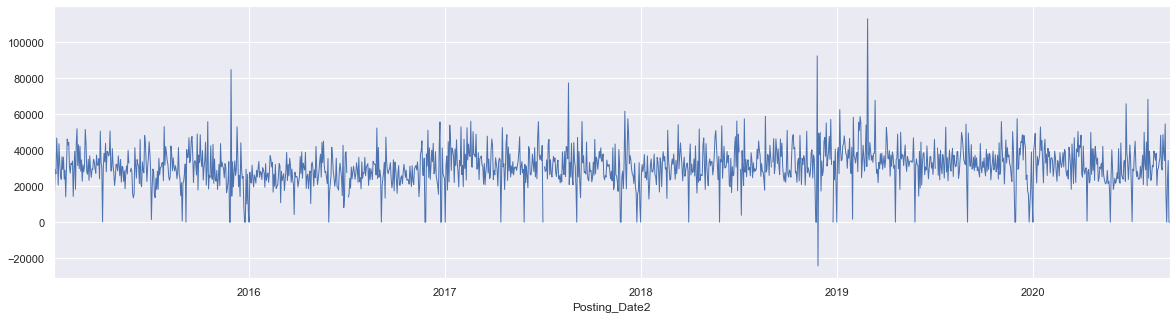

In [60]:
%matplotlib inline
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 5)})
data_2015['503'].plot(linewidth=1);

In [61]:
for i in data_2015.columns:
    print(data_2015[i].isnull().sum())

8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [63]:
print(data_2015.shape)
data_2015_nonan = data_2015.dropna(axis = 0, how = 'any')
data_2015_nonan.shape

(1486, 14)


(1478, 14)

C:\Users\thoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


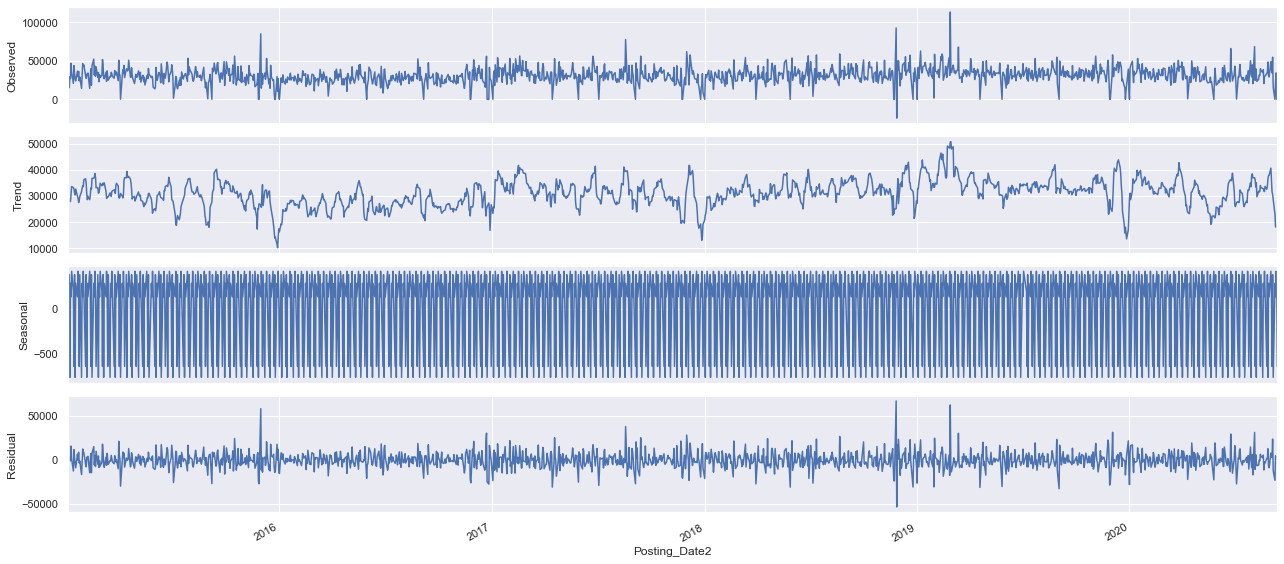

In [67]:
## Time Series Decomposition - additive - weekly

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_2015_nonan['503'], freq = 7,model='additive')
fig = decomposition.plot()
fig.show()

C:\Users\thoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


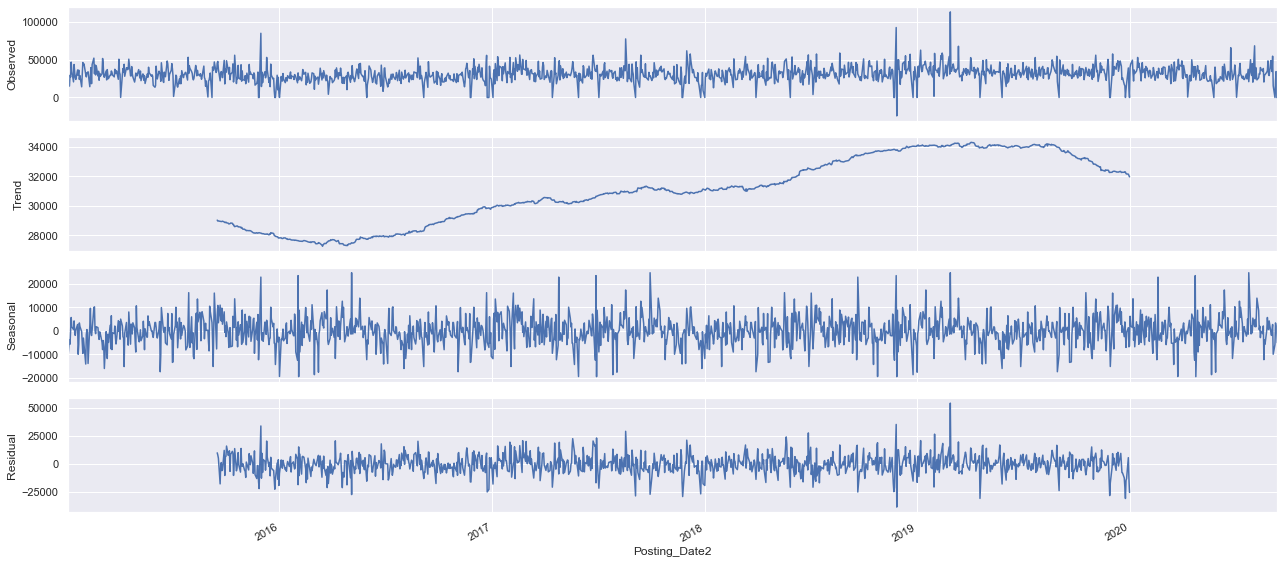

In [68]:
## Time Series Decomposition - additive - yearly

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_2015_nonan['503'], freq = 365,model='additive')
fig = decomposition.plot()
fig.show()

In [ ]:
decomposition.resid
decomposition.seasonal
decomposition.trend
decomposition.observed

In [83]:
from statsmodels.tsa.stattools import adfuller
X = data_2015_nonan['505']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.894016
p-value: 0.002079
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
data_2015.columns

In [ ]:
# import plotly.express as px

# fig = px.line(data_2015, x='Posting_Date2', y="503")
# fig.show()

In [ ]:
modelling_data = data_2015.drop(['Posting_Date'], axis=1)
modelling_data.columns

In [75]:
modelling_data2 = data_2015_nonan[['503','505']]
type(modelling_data2)

pandas.core.frame.DataFrame

In [93]:
train = modelling_data2['2015-01-10':'2019-12-30']
valid  = modelling_data2['2020-01-01':]

In [94]:
print(train.shape)
print(valid.shape)

(1288, 2)
(183, 2)


In [87]:
#creating the train and validation set
# train = modelling_data2[:int(0.95*(len(modelling_data2)))]
# valid = modelling_data2[int(0.95*(len(modelling_data2))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\thoma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
print(model_fit)

In [92]:
#converting predictions to dataframe
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[modelling_data2.columns])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
       
# forecast_errors = [valid[i]-pred[i] for i in range(len(valid))]
# print('Forecast Errors: %s' % forecast_errors)

#check rmse
for i in modelling_data2.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))
    print('mae value for', i, 'is : ', mean_squared_error(pred[i], valid[i]))

rmse value for 503 is :  12224.02811650664
mae value for 503 is :  149426863.39314488
rmse value for 505 is :  25610.64981227245
mae value for 505 is :  655905383.8068509


In [89]:
for i in modelling_data2.columns:
    print()

SyntaxError: unexpected EOF while parsing (<ipython-input-89-97aeb976642c>, line 1)